In [97]:
import json

with open("data.json") as file:
    data = json.loads(file.read())

len(data)

463

In [98]:
from collections import Counter

def get_most_common(array, n=30):
    return list(map(lambda x: x[0], Counter(array).most_common(n)))

In [99]:
from collections import Counter

cookie_domains = [[], []]

for hostname in data:
      for cookie in data[hostname]["cookies"]:
        if cookie["is_thirdparty"]:
          tracker_index = 1 if cookie["is_tracker"] else 0
          cookie_domains[tracker_index].append(cookie["domain"])

nontracker_cookies = get_most_common(cookie_domains[1])
tracker_cookies = get_most_common(cookie_domains[1])

In [100]:
trackers = []
for hostname in data:
    trackers += data[hostname]["tracking"]["trackers"]
trackers = get_most_common(trackers)

In [101]:
third_parties = []
for hostname in data:
    third_parties += data[hostname]["third_parties"]["fqdns"]
third_parties = get_most_common(third_parties)

In [102]:
"""nontracker_cookies = [
    ".bing.com",
    ".c.bing.com",
    "g.alicdn.com",
    "bat.bing.com",
    "c.bing.com",
    ".slickdeals.net",
    "sp.auth.adobe.com",
    ".google.com"
]

tracker_cookies = [
    ".rubiconproject.com",
    ".pubmatic.com",
    ".casalemedia.com",
    ".mookie1.com",
    ".adnxs.com",
    ".doubleclick.net",
    ".scorecardresearch.com",
    ".w55c.net",
    ".bluekai.com",
    ".bidswitch.net",
    ".advertising.com",
    ".adsrvr.org",
    "ads.stickyadstv.com",
    ".linkedin.com",
    ".crwdcntrl.net",
    ".smartadserver.com",
]

trackers = [
    "www.google-analytics.com",
    "cm.g.doubleclick.net",
    "googleads.g.doubleclick.net",
    "www.google.com",
    "adservice.google.com",
    "ib.adnxs.com",
    "www.facebook.com",
    "sb.scorecardresearch.com",
    "securepubads.g.doubleclick.net",
    "stats.g.doubleclick.net",
]

third_parties = [
    "www.google-analytics.com",
    "cm.g.doubleclick.net",
    "googleads.g.doubleclick.net",
    "www.google.com",
    "adservice.google.com",
    "ib.adnxs.com",
    "www.facebook.com",
    "sb.scorecardresearch.com",
    "securepubads.g.doubleclick.net",
    "stats.g.doubleclick.net",
]"""

def json_to_array(data):
    result = []
    data_cookies = [x["domain"] for x in data["cookies"]]
    for c in tracker_cookies + nontracker_cookies:
        if c in data_cookies:
            result.append(1)
        else:
            result.append(0)
    
    result.append(data["cookiestats"]["first_party_long"])
    result.append(data["cookiestats"]["first_party_short"])
    
    result.append(data["cookiestats"]["third_party_long"])
    result.append(data["cookiestats"]["third_party_short"])
            
    for t in trackers:
        if t in data["tracking"]["trackers"]:
            result.append(1)
        else:
            result.append(0)
    
    result.append(data["tracking"]["num_tracker_requests"])
    result.append(data["tracking"]["num_tracker_cookies"])
    
    for tp in third_parties:
        if tp in data["third_parties"]["fqdns"]:
            result.append(1)
        else:
            result.append(0)
        result.append
    result.append(data["third_parties"]["num_http_requests"] + data["third_parties"]["num_https_requests"])
    try:
        if data["fingerprinting"]["canvas"]["is_fingerprinting"]:
            result.append(1)
        else:
            result.append(0)
    except:
        result.append(0)
    
    return result

In [103]:
vectorized_data = []
for index, hostname in enumerate(data):
    vectorized_data.append(json_to_array(data[hostname]))

In [126]:
import umap
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=2)
reducer.fit(vectorized_data)

embedding = reducer.transform(vectorized_data)

In [127]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, ContinuousColorMapper
from bokeh.palettes import Inferno256
import pandas as pd
import hdbscan

websites_df = pd.DataFrame(embedding, columns=('x', 'y'))
websites_df['hostname'] = list(data.keys())

labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=50,
).fit_predict(embedding)
clustered = (labels >= 0)

datasource = ColumnDataSource(websites_df)
color_mapping = ContinuousColorMapper(palette=Inferno256, low=min(scores), high=max(scores))
output_notebook()

plot_figure = figure(
    title='Websites',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='https://@hostname/favicon.ico' style=''/>
    </div>
    <div>
        <span style='font-size: 14px'>@hostname</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    line_alpha=0.9,
    fill_alpha=0.9,
    size=8
)
show(plot_figure)

Loading BokehJS ...

In [128]:
len(vectorized_data[0])

128

In [110]:
import requests

init_data = requests.get("http://localhost:5000/data").json()

In [112]:
scores = []
for i in init_data:
    scores.append(init_data[i]["score"])

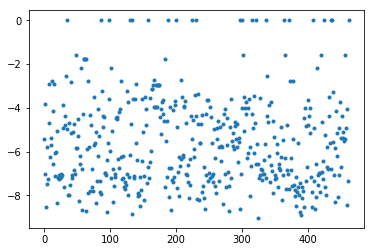

In [117]:
import matplotlib.pyplot as plt

plt.plot(scores, '.')

In [120]:
data["duckduckgo.com"]

KeyError: 'duckduckgo.com'